In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt 
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing




## # Data Prep 

- Gathered browns' most recent schedule and game results data from Pro football referece .com on Dec 21 
- Downloaded last 3 full seasons from 2019 to 2021 and partial season for 2022 which only includes first 16 regular season games 
- Combine games into one excel document 
- remove bye weeks 
- Deleted data corresponding to expected points, because this is an engineered feature 
- Rename columns under categories score, offense and defense and expected points 
    - tm to points scored, opp to points allowed 
    - 1st downs gained
    - pass yards gained 
    - rush yards gained 
    - turnovers 
    
    Defense 
    - first downs allowed 
    - total yards allowed 
    - pass yards allowed 
    - rush yards allowed 
    - forced turnovers 
 - Including playoff games in record because goal is to predict browns ability to win a game regardless of whether it is regular season or post season 
 
- delete first row of data (score, offense, defense should be removed) 
- updated dates to reflect year game was played


In [2]:
df = pd.read_excel('consolidated record.xls')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Week        65 non-null     int64         
 1   Day         65 non-null     object        
 2   Date        65 non-null     datetime64[ns]
 3   Unnamed: 3  65 non-null     object        
 4   Unnamed: 4  65 non-null     object        
 5   Unnamed: 5  65 non-null     object        
 6   OT          1 non-null      object        
 7   Rec         65 non-null     object        
 8   Location    33 non-null     object        
 9   Opp         65 non-null     object        
 10  tm          65 non-null     int64         
 11  Opp.1       65 non-null     int64         
 12  1stD o      65 non-null     int64         
 13  TotYd o     65 non-null     int64         
 14  PassY o     65 non-null     int64         
 15  RushY o     65 non-null     int64         
 16  TO o        47 non-null     

In [4]:
# drop columns don't want: OT, Rec, Week, Unnamed: 3, 4
# dropping columns 
df = df.drop(columns= ['Week','Day','Date','Unnamed: 3','Unnamed: 4','OT','Rec'])



In [5]:
 df.columns = [column.replace(' ','_').lower() for column in df]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unnamed:_5  65 non-null     object 
 1   location    33 non-null     object 
 2   opp         65 non-null     object 
 3   tm          65 non-null     int64  
 4   opp.1       65 non-null     int64  
 5   1std_o      65 non-null     int64  
 6   totyd_o_    65 non-null     int64  
 7   passy_o_    65 non-null     int64  
 8   rushy_o_    65 non-null     int64  
 9   to_o_       47 non-null     float64
 10  1std_d_     65 non-null     int64  
 11  totyd_d_    65 non-null     int64  
 12  passy_d_    65 non-null     int64  
 13  rushy_d_    65 non-null     int64  
 14  to_d_       43 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory usage: 7.7+ KB


In [7]:
# renaming column names to more readable format
df = df.rename(columns = {'unnamed:_5':'result', 'opp':'opponent',
                              'opp.1':'points_allowed', 
                              'tm':'points_scored',
                              '1std_o':'first_downs_gained', 'totyd_o_':'total_yards_gained',
                              'passy_o_':'pass_yards_gained',
                              'rushy_o_':'rush_yards_gained','to_o_':'turnovers','1std_d_':'first_downs_allowed',
                              'totyd_d_':'total_yards_allowed',
                              'passy_d_':'pass_yards_allowed','rushy_d_':'rush_yards_allowed',
                              'to_d_':'turnovers_forced',})

In [8]:
# cleaned column names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             33 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            47 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     43 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

## Address nulls 
- location 
- turnovers 
- turnovers forced 

null in turnovervs and turnovers forced can be replaced with 0 
null for location means home game 

In [9]:
# fill all nans with zero value 
df = df.fillna(0)

In [10]:
# no more nulls 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             65 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            65 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     65 non-null     float64
dtypes: float64(2), int64(10), object(3)
memory

In [11]:
# replace zeros in location with word home and replace @ symbol with away 
df['location'] = df['location'].replace([0, '@'], ['home', 'away',])


In [12]:
df.shape
#65 observations with 15 columns 

(65, 15)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
points_scored,65.0,22.615385,10.929736,3.0,14.0,22.0,29.0,49.0
points_allowed,65.0,24.123077,11.009240,3.0,16.0,23.0,32.0,47.0
first_downs_gained,65.0,20.676923,4.870535,9.0,17.0,21.0,24.0,33.0
total_yards_gained,65.0,352.830769,77.791301,180.0,300.0,355.0,398.0,531.0
pass_yards_gained,65.0,213.276923,61.924982,78.0,171.0,205.0,254.0,355.0
rush_yards_gained,65.0,139.553846,54.467889,40.0,99.0,138.0,182.0,307.0
turnovers,65.0,1.323077,1.147112,0.0,0.0,1.0,2.0,4.0
first_downs_allowed,65.0,20.876923,5.619463,6.0,17.0,20.0,24.0,35.0
total_yards_allowed,65.0,347.707692,89.621901,47.0,302.0,339.0,397.0,566.0
pass_yards_allowed,65.0,224.892308,85.946408,1.0,182.0,216.0,268.0,501.0


In [14]:
df.head()

,result,location,opponent,points_scored,points_allowed,first_downs_gained,total_yards_gained,pass_yards_gained,rush_yards_gained,turnovers,first_downs_allowed,total_yards_allowed,pass_yards_allowed,rush_yards_allowed,turnovers_forced
0,L,home,Tennessee Titans,13,43,19,346,244,102,3.0,21,339,216,123,0.0
1,W,away,New York Jets,23,3,16,375,305,70,1.0,13,262,169,93,1.0
2,L,home,Los Angeles Rams,13,20,18,270,175,95,1.0,20,344,254,90,3.0
3,W,away,Baltimore Ravens,40,25,22,530,337,193,1.0,24,395,222,173,3.0
4,L,away,San Francisco 49ers,3,31,9,180,78,102,4.0,22,446,171,275,0.0


In [15]:
# creating column with the result of winning the game 
df['game_won'] = df['result'] == 'W'
# creating column to account for rushing for more than 200 yards 
df['200_plus_yards'] = df['rush_yards_gained'] > 180
#replace true and false values with 1 and 0 
df.replace({False: 0, True: 1}, inplace=True)


In [16]:
# Baseline will be assuming browns lose every game and this will result in a 51% accuracy 
df.result.value_counts(normalize=True)

L    0.507692
W    0.492308
Name: result, dtype: float64

In [17]:
# Total record last 3.5 seasons 
df.result.value_counts()

L    33
W    32
Name: result, dtype: int64

### takeaways
- browns lose more than they win 
- Baseline model would be browns lose every game and would be right 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               65 non-null     object 
 1   location             65 non-null     object 
 2   opponent             65 non-null     object 
 3   points_scored        65 non-null     int64  
 4   points_allowed       65 non-null     int64  
 5   first_downs_gained   65 non-null     int64  
 6   total_yards_gained   65 non-null     int64  
 7   pass_yards_gained    65 non-null     int64  
 8   rush_yards_gained    65 non-null     int64  
 9   turnovers            65 non-null     float64
 10  first_downs_allowed  65 non-null     int64  
 11  total_yards_allowed  65 non-null     int64  
 12  pass_yards_allowed   65 non-null     int64  
 13  rush_yards_allowed   65 non-null     int64  
 14  turnovers_forced     65 non-null     float64
 15  game_won             65 non-null     int64

In [19]:
# Converting data types to integers 
df.astype({'turnovers':'int64','turnovers_forced':'int64'}).dtypes

result                 object
location               object
opponent               object
points_scored           int64
points_allowed          int64
first_downs_gained      int64
total_yards_gained      int64
pass_yards_gained       int64
rush_yards_gained       int64
turnovers               int64
first_downs_allowed     int64
total_yards_allowed     int64
pass_yards_allowed      int64
rush_yards_allowed      int64
turnovers_forced        int64
game_won                int64
200_plus_yards          int64
dtype: object

In [20]:
# split data, complete exploration of variables, come up with statistical questions 

In [21]:
# split data 

# splitting data into test and validate samples 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.result)
# splitting data into train and validate samples 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.result)

In [22]:
train.shape

(36, 17)

In [23]:
validate.shape

(16, 17)

In [24]:
test.shape

(13, 17)

In [25]:
train

,result,location,opponent,points_scored,points_allowed,first_downs_gained,total_yards_gained,pass_yards_gained,rush_yards_gained,turnovers,first_downs_allowed,total_yards_allowed,pass_yards_allowed,rush_yards_allowed,turnovers_forced,game_won,200_plus_yards
43,L,away,New England Patriots,7,45,17,217,118,99,1.0,30,452,268,184,0.0,0,0
35,W,home,Houston Texans,31,21,22,355,199,156,2.0,17,302,220,82,2.0,1,0
55,L,home,Los Angeles Chargers,28,30,27,443,230,213,1.0,26,465,227,238,0.0,0,1
0,L,home,Tennessee Titans,13,43,19,346,244,102,3.0,21,339,216,123,0.0,0,0
26,W,away,Jacksonville Jaguars,27,25,25,459,252,207,1.0,22,375,235,140,0.0,1,1
45,L,away,Baltimore Ravens,10,16,14,262,222,40,2.0,22,303,155,148,4.0,0,0
44,W,home,Detroit Lions,13,10,22,349,165,184,2.0,12,245,77,168,2.0,1,1
15,L,away,Cincinnati Bengals,23,33,15,313,239,74,3.0,22,361,182,179,1.0,0,0
27,W,away,Tennessee Titans,41,35,26,458,340,118,1.0,25,431,369,62,3.0,1,0
24,W,home,Houston Texans,10,7,20,356,125,231,0.0,16,243,153,90,0.0,1,1


<AxesSubplot:xlabel='location', ylabel='count'>

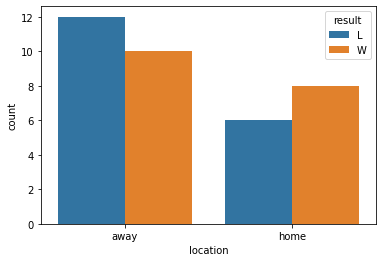

In [26]:
# Create for loop to produce graphics for categorical variables and target 
# categoricals location
sns.countplot(data=train, x="location", hue="result")

In [27]:
# cross tab created in preparation to run chi^2 test
observed = pd.crosstab(train.result, train.location)
observed


location,away,home
result,,
L,12,6
W,10,8


In [28]:
# chi square statistical test 
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

0.7324398999038724

### Takeaways 
- appears that browns win more games at home then away
- not significant according to test 

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 43 to 40
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               36 non-null     object 
 1   location             36 non-null     object 
 2   opponent             36 non-null     object 
 3   points_scored        36 non-null     int64  
 4   points_allowed       36 non-null     int64  
 5   first_downs_gained   36 non-null     int64  
 6   total_yards_gained   36 non-null     int64  
 7   pass_yards_gained    36 non-null     int64  
 8   rush_yards_gained    36 non-null     int64  
 9   turnovers            36 non-null     float64
 10  first_downs_allowed  36 non-null     int64  
 11  total_yards_allowed  36 non-null     int64  
 12  pass_yards_allowed   36 non-null     int64  
 13  rush_yards_allowed   36 non-null     int64  
 14  turnovers_forced     36 non-null     float64
 15  game_won             36 non-null     int6

<AxesSubplot:>

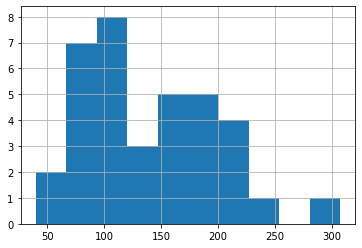

In [30]:
# distribution of rush yards per game 
train.rush_yards_gained.hist()

In [31]:
train[train.result == "W"]


,result,location,opponent,points_scored,points_allowed,first_downs_gained,total_yards_gained,pass_yards_gained,rush_yards_gained,turnovers,first_downs_allowed,total_yards_allowed,pass_yards_allowed,rush_yards_allowed,turnovers_forced,game_won,200_plus_yards
35,W,home,Houston Texans,31,21,22,355,199,156,2.0,17,302,220,82,2.0,1,0
26,W,away,Jacksonville Jaguars,27,25,25,459,252,207,1.0,22,375,235,140,0.0,1,1
44,W,home,Detroit Lions,13,10,22,349,165,184,2.0,12,245,77,168,2.0,1,1
27,W,away,Tennessee Titans,41,35,26,458,340,118,1.0,25,431,369,62,3.0,1,0
24,W,home,Houston Texans,10,7,20,356,125,231,0.0,16,243,153,90,0.0,1,1
3,W,away,Baltimore Ravens,40,25,22,530,337,193,1.0,24,395,222,173,3.0,1,1
62,W,away,Houston Texans,27,14,14,304,130,174,2.0,16,283,201,82,4.0,1,0
19,W,away,Dallas Cowboys,49,38,33,508,201,307,0.0,35,566,481,85,3.0,1,1
42,W,away,Cincinnati Bengals,41,16,14,361,208,153,0.0,25,348,263,85,3.0,1,0
64,W,home,Baltimore Ravens,13,3,19,283,140,143,0.0,17,324,126,198,2.0,1,0


<AxesSubplot:title={'center':'Rush Yards in Games Won'}, ylabel='Frequency'>

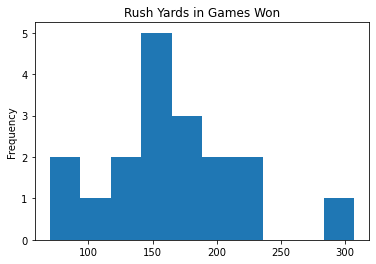

In [32]:
# rush yards in games won 
rush_sample_won = train[train.result == "W"].rush_yards_gained
#histogram of rush yards in games won 
rush_sample_won.plot(kind='hist', title='Rush Yards in Games Won')


<AxesSubplot:>

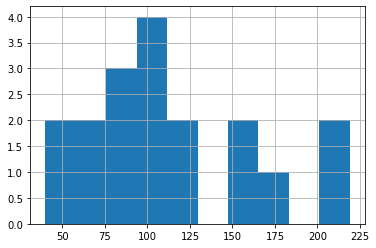

In [33]:
# mean of rush yards in games lost 
rush_sample_loss = train[train.result == "L"].rush_yards_gained

rush_sample_loss.hist()

In [34]:
print(rush_sample_loss.var())
print(rush_sample_won.var())

2610.4477124183004
3243.428104575164


In [35]:
# stats test 
t, p = stats.ttest_ind(rush_sample_loss, rush_sample_won,equal_var=False)

print(t, p/2)



-2.809550438626541 0.004104438372629666


###  hypothesis 

Hnull: Mean rushing yards in games won <= mean of rush yards in games lost <br>
Halt: Mean of rushing yards in games won is > mean of rush yards in games lost


### takeaway 
- reject null hypothesis and accept alternative 
- there is support for the idea that the mean of rushing yards in games won is greater than in games lost
- consider using rush yards for model 

<AxesSubplot:>

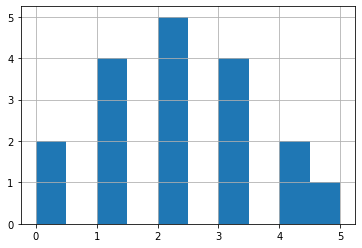

In [36]:
# distribution of turnovers in games won 
forced_turnovers_won_sample = train[train.result == "W"].turnovers_forced
#
forced_turnovers_won_sample.hist()

<AxesSubplot:>

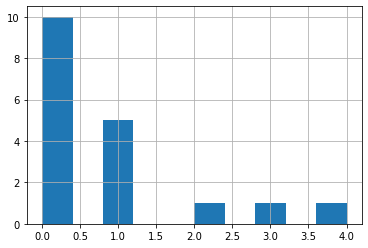

In [37]:
# distribution of turnovers in games lost 
forced_turnovers_loss_sample = train[train.result == "L"].turnovers_forced

forced_turnovers_loss_sample.hist()

In [38]:
print(forced_turnovers_loss_sample.var())
print(forced_turnovers_won_sample.var())

1.3594771241830066
1.911764705882353


In [39]:
# stats test 
t, p = stats.ttest_ind(forced_turnovers_loss_sample, forced_turnovers_won_sample,equal_var=False)

print(t, p/2)


-3.2579726233327397 0.0012990882723402553


## Hypothesis 

Hnull: Mean forced turnovers in games won <= mean of forced turnovers in games lost <br>
Halt: Mean of forced turnovers in games won is > mean of forced turnovers in games lost

### Takeaways 

- Statistical tests supports the idea that forced turnovers has a relationship with the result of the game 

In [40]:
df

,result,location,opponent,points_scored,points_allowed,first_downs_gained,total_yards_gained,pass_yards_gained,rush_yards_gained,turnovers,first_downs_allowed,total_yards_allowed,pass_yards_allowed,rush_yards_allowed,turnovers_forced,game_won,200_plus_yards
0,L,home,Tennessee Titans,13,43,19,346,244,102,3.0,21,339,216,123,0.0,0,0
1,W,away,New York Jets,23,3,16,375,305,70,1.0,13,262,169,93,1.0,1,0
2,L,home,Los Angeles Rams,13,20,18,270,175,95,1.0,20,344,254,90,3.0,0,0
3,W,away,Baltimore Ravens,40,25,22,530,337,193,1.0,24,395,222,173,3.0,1,1
4,L,away,San Francisco 49ers,3,31,9,180,78,102,4.0,22,446,171,275,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,L,away,Buffalo Bills,23,31,27,396,316,80,1.0,22,357,186,171,0.0,0,0
61,W,home,Tampa Bay Buccaneers,23,17,22,367,178,189,1.0,16,325,229,96,0.0,1,1
62,W,away,Houston Texans,27,14,14,304,130,174,2.0,16,283,201,82,4.0,1,0
63,L,away,Cincinnati Bengals,10,23,18,344,273,71,1.0,23,363,227,136,1.0,0,0


# Takeaways 
significant difference in mean of rush yards in games browns won compared to all games 

In [41]:
total_yards_allowed_won_sample = train[train.result == "W"].total_yards_allowed

<AxesSubplot:>

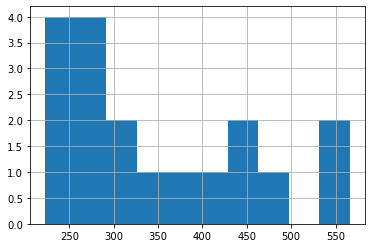

In [42]:
total_yards_allowed_won_sample.hist()

In [43]:
total_yards_allowed_loss_sample = train[train.result == "L"].total_yards_allowed

<AxesSubplot:>

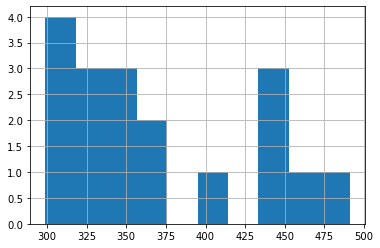

In [44]:
total_yards_allowed_loss_sample.hist()

In [45]:
print(total_yards_allowed_loss_sample.var())
print(total_yards_allowed_won_sample.var())

3812.5000000000005
11773.830065359474


In [46]:
# stats test 
t, p = stats.ttest_ind(total_yards_allowed_won_sample, total_yards_allowed_loss_sample,equal_var=False)

print(t, p)

-0.768397993688826 0.44892853171293823


## hypothesis 
Hnull: Mean turnovers in games won >= mean of forced turnovers in games lost <br>
Halt: Mean of turnovers in games won is < mean of forced turnovers in games lost

### Takeaways 
- not a relationship between turnovers and outcome of the game 


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 43 to 40
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   result               36 non-null     object 
 1   location             36 non-null     object 
 2   opponent             36 non-null     object 
 3   points_scored        36 non-null     int64  
 4   points_allowed       36 non-null     int64  
 5   first_downs_gained   36 non-null     int64  
 6   total_yards_gained   36 non-null     int64  
 7   pass_yards_gained    36 non-null     int64  
 8   rush_yards_gained    36 non-null     int64  
 9   turnovers            36 non-null     float64
 10  first_downs_allowed  36 non-null     int64  
 11  total_yards_allowed  36 non-null     int64  
 12  pass_yards_allowed   36 non-null     int64  
 13  rush_yards_allowed   36 non-null     int64  
 14  turnovers_forced     36 non-null     float64
 15  game_won             36 non-null     int6

## Prepare for modeling 

In [48]:
### establish variables 
def model_columns(train,validate,test):
    '''This function will provide my models with the correct features to run for their x and y values'''

    # assigning features to be used for modeling  
    x_cols = ['rush_yards_gained','turnovers_forced']
    y_train = train['result']

    # changing y train into a dataframe to append the new column with predicted values 
    y_train = pd.DataFrame(y_train)

    # assigning features to be used for modeling to train, validate and test data sets
    X_train = train[x_cols]
    X_validate = validate[x_cols]
    y_validate = validate['result']
    X_test = test[x_cols]
    y_test = test['result']

    # changing y validate into a dataframe to append the new column with predicted values 
    y_validate= pd.DataFrame(y_validate)

    # changing y validate into a dataframe to append the new column with predicted values
    y_test= pd.DataFrame(y_test)


In [49]:
    # assigning features to be used for modeling  
    x_cols = ['rush_yards_gained','turnovers_forced']
    y_train = train['result']

    # changing y train into a dataframe to append the new column with predicted values 
    y_train = pd.DataFrame(y_train)

    # assigning features to be used for modeling to train, validate and test data sets
    X_train = train[x_cols]
    X_validate = validate[x_cols]
    y_validate = validate['result']
    X_test = test[x_cols]
    y_test = test['result']

    # changing y validate into a dataframe to append the new column with predicted values 
    y_validate= pd.DataFrame(y_validate)

    # changing y validate into a dataframe to append the new column with predicted values
    y_test= pd.DataFrame(y_test)

### scale variables 

In [50]:
def scaling(X_train,X_validate,X_test):
    '''function will scale features across data sets train, validate and test'''
    # applying scaling to all the data splits.
    scaler = sklearn.preprocessing.RobustScaler()
    scaler.fit(X_train)

    # transforming train, validate and test datasets
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)
  
    return X_train_scaled, X_validate_scaled, X_test_scaled

In [51]:
# applying scaling to all the data splits.
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X_train)

# transforming train, validate and test datasets
X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
X_test_scaled = scaler.transform(X_test)
  


In [52]:
# df ready for modeling
X_train_scaled

array([[-0.66919642, -1.03406022],
       [ 0.30746863,  0.37070084],
       [ 1.28413368, -1.03406022],
       [-0.617793  , -1.03406022],
       [ 1.18132683, -1.03406022],
       [-1.68013042,  1.7754619 ],
       [ 0.78723391,  0.37070084],
       [-1.09755829, -0.33167969],
       [-0.34364141,  1.07308137],
       [ 1.59255422, -1.03406022],
       [-0.99475144, -1.03406022],
       [ 0.2560652 , -1.03406022],
       [-1.11469276, -1.03406022],
       [ 0.94144419,  1.07308137],
       [ 0.61588917,  1.7754619 ],
       [-0.84054117,  0.37070084],
       [ 2.89477429,  1.07308137],
       [ 0.2560652 ,  1.07308137],
       [-0.77200327, -0.33167969],
       [ 1.38694052, -1.03406022],
       [ 0.08472046,  0.37070084],
       [ 1.35267158, -0.33167969],
       [-0.63492747, -1.03406022],
       [-0.96048249,  0.37070084],
       [-0.73773432,  1.07308137],
       [ 0.13612388, -0.33167969],
       [-0.18943114,  2.47784243],
       [-0.44644825, -1.03406022],
       [ 0.66729259,

In [53]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = (y_train == 'L')

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy:" 'baseline_accuracy')

Baseline accuracy:baseline_accuracy


## Model 1 Decision Tree 

In [54]:
# Make the model
tree1 = DecisionTreeClassifier(max_depth=1, random_state=100)

# Fit the model (on train and only train)
tree1 = tree1.fit(X_train_scaled, y_train)

# Evaluating model on training sample
y_predictions = tree1.predict(X_train_scaled)

#printing accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train_scaled, y_train)))

Accuracy of Decision Tree classifier on training set: 0.78


## Model 2 Random Forrest 

In [55]:
# creating Random Forrest classifier, algorithm
rf = RandomForestClassifier(
    min_samples_leaf=2, 
    max_depth=3, 
    random_state=100)

In [56]:
# Fit model to sample data

rf.fit(X_train_scaled, y_train)

#creating predictions from training sample 
y_preds = rf.predict(X_train_scaled)

# evaluating model
rf.score(X_train_scaled, y_train)

/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_66894/1683529334.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled, y_train)


0.8611111111111112

## Model 3 KNN 

In [57]:
# creating model
knn = KNeighborsClassifier(n_neighbors=3)
knn

# fitting data to train data 
knn.fit(X_train, y_train)
# generating predictions for train data 
y_preds = knn.predict(X_train_scaled)

# Evaluating results of model, confusion matrix, and classification report.

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))

Accuracy of KNN classifier on training set: 0.50


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Model 4 Logistic Regression

In [58]:
# Define the logistic regression model

logit = LogisticRegression(random_state=100)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train_scaled)

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train_scaled, y_train)))

Baseline is result    0.5
dtype: float64
Accuracy of Logistic Regression classifier on training set: 0.50


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Validate two best models 

In [59]:
X_validate

,rush_yards_gained,turnovers_forced
21,75,0.0
28,138,0.0
5,157,1.0
52,184,1.0
7,90,1.0
8,147,0.0
36,215,0.0
17,215,1.0
57,113,1.0
50,205,0.0


In [60]:
y_validate.shape

(16, 1)

In [61]:
# creating model
knn = KNeighborsClassifier(n_neighbors=2)

# fitting data to train data 
knn.fit(X_train, y_train)

y_preds = knn.predict(X_validate_scaled)


# Evaluating results of model, confusion matrix, and classification report.

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_validate_scaled, y_validate)))

Accuracy of KNN classifier on training set: 0.50


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [62]:
# Define the logistic regression model

logit = LogisticRegression(random_state=100)

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train, y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_validate_scaled)

print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_validate_scaled, y_validate)))

Baseline is result    0.5
dtype: float64
Accuracy of Logistic Regression classifier on training set: 0.50


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [63]:
# creating Random Forrest classifier, algorithm

rf = RandomForestClassifier(
    min_samples_leaf=2, 
    max_depth=3, 
    random_state=100)

# Fit model to sample data

rf.fit(X_train, y_train)

#creating predictions from training sample 
y_preds = rf.predict(X_validate_scaled)

# evaluating model
rf.score(X_validate_scaled, y_validate)

/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_66894/2950215432.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.5

In [64]:
# creating Random Forrest classifier, algorithm

rf = RandomForestClassifier(
    min_samples_leaf=2, 
    max_depth=3, 
    random_state=100)

# Fit model to sample data

rf.fit(X_train, y_train)

#creating predictions from training sample 
y_preds = rf.predict(X_test_scaled)

# evaluating model
rf.score(X_test_scaled, y_test)

/var/folders/f1/m4_s2k_97xng0khbnvxb1jbw0000gn/T/ipykernel_66894/3442751670.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.5384615384615384

## Conclusion

### Summary
- Browns win more games at home then away 
- The significant features identified during exploration were rushing yards and forced turnovers
- The Browns lose more games than they win 
- The location of the game did not have an association with the result of the game 
- The total yards allowed did not have an association with the result of the game 

### Modeling Summary 
- The features used for modeling were rushing yards gained and turnovers forced
- The final model performed 3% better than the baseline model at predicting the result of the game
- I would not recommend this model for production


### Recommendations
* I would recommend the browns center their offensive strategy on rushing the ball
* The defense should focus their strategy on playing aggressive and creating turnovers 


### Next Steps
* with more time I would explore if there is an association between passing yards gained and game result
* I would also take time to find out if there is a relationship between poitns allowed by the Browns and the outcome of the game
* I would like to find more features to combine with rushing yards gained and turnovers forced to attempt to create a better model